In [1]:

%pprint
import pandas as pd

Pretty printing has been turned OFF


In [2]:

# Always get fresh data
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
owid_df = pd.read_csv(url)
owid_df.columns.tolist()

['iso_code', 'location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'tests_units', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cvd_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_100k']

In [3]:

# Always get fresh data
url = 'https://covidtracking.com/api/v1/states/daily.csv'
ct_df = pd.read_csv(url)
print(ct_df.columns.tolist())
ct_df.groupby('state').hospitalizedCumulative.max().idxmax()

['date', 'state', 'positive', 'negative', 'pending', 'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered', 'dataQualityGrade', 'lastUpdateEt', 'hash', 'dateChecked', 'death', 'hospitalized', 'total', 'totalTestResults', 'posNeg', 'fips', 'deathIncrease', 'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease', 'totalTestResultsIncrease']


'NY'

In [9]:

from datetime import date

ct_df.date = ct_df.date.map(lambda x: date(year=int(str(x)[:4]), month=int(str(x)[4:6]), day=int(str(x)[6:8])))

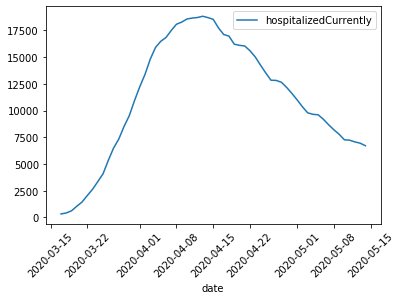

In [11]:

mask_series = (ct_df.state == 'NY')
#print(['series.{}'.format(fn) for fn in dir(series) if 'max' in fn.lower()])
axes_subplot_obj = ct_df[mask_series].plot.line(x='date', y='hospitalizedCurrently', rot=45)